In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Read data from csv

In [467]:
df_adaptive = pd.read_csv("simulation_adaptive_NN_controller_data_circ6_melisimo.csv")
df_adaptive_rec = pd.read_csv("simulation_adaptive_NN_controller_data_rec3_melo.csv")
df_smc = pd.read_csv("simulation_smc_data_circ.csv")
df_smc_rec = pd.read_csv("simulation_smc_data_rect.csv")

### Save all important variables

In [468]:
time, x, y, yaw, d_x, d_y, d_yaw, x_ref, y_ref, yaw_ref, d_x_ref, d_y_ref, d_yaw_ref, xe, ye, yaw_e, vx_local, vx_local_ref, vc, wc, kx, ky, kt, accuracy, cost = df_adaptive.time.values, df_adaptive.x.values, df_adaptive.y.values, df_adaptive.yaw.values, df_adaptive.d_x.values, df_adaptive.d_y.values, df_adaptive.d_yaw.values, df_adaptive.x_ref.values, df_adaptive.y_ref.values, df_adaptive.yaw_ref.values, df_adaptive.d_x_ref.values, df_adaptive.d_y_ref.values, df_adaptive.d_yaw_ref.values, df_adaptive.xe.values, df_adaptive.ye.values, df_adaptive.yaw_e.values, df_adaptive.vx_local.values, df_adaptive.vx_local_ref.values, df_adaptive.vc.values, df_adaptive.wc.values, df_adaptive.kx.values, df_adaptive.ky.values, df_adaptive.kt.values, df_adaptive.accuracy.values, df_adaptive.cost.values

time_r, x_r, y_r, yaw_r, d_x_r, d_y_r, d_yaw_r, x_ref_r, y_ref_r, yaw_ref_r, d_x_ref_r, d_y_ref_r, d_yaw_ref_r, xe_r, ye_r, yaw_e_r, vx_local_r, vx_local_ref_r, vc_r, wc_r, kx_r, ky_r, kt_r, accuracy_r, cost_r = df_adaptive_rec.time.values, df_adaptive_rec.x.values, df_adaptive_rec.y.values, df_adaptive_rec.yaw.values, df_adaptive_rec.d_x.values, df_adaptive_rec.d_y.values, df_adaptive_rec.d_yaw.values, df_adaptive_rec.x_ref.values, df_adaptive_rec.y_ref.values, df_adaptive_rec.yaw_ref.values, df_adaptive_rec.d_x_ref.values, df_adaptive_rec.d_y_ref.values, df_adaptive_rec.d_yaw_ref.values, df_adaptive_rec.xe.values, df_adaptive_rec.ye.values, df_adaptive_rec.yaw_e.values, df_adaptive_rec.vx_local.values, df_adaptive_rec.vx_local_ref.values, df_adaptive_rec.vc.values, df_adaptive_rec.wc.values, df_adaptive_rec.kx.values, df_adaptive_rec.ky.values, df_adaptive_rec.kt.values, df_adaptive_rec.accuracy.values, df_adaptive_rec.cost.values

print(time.shape)
print(time_r.shape)
time = time-time[0]
time_r = time_r-time_r[0]
#clip yaw_e
yaw_e_r = yaw_e_r.clip(min=-0.3)
xe_r = xe_r.clip(min=-0.3)

(29328,)
(4533,)


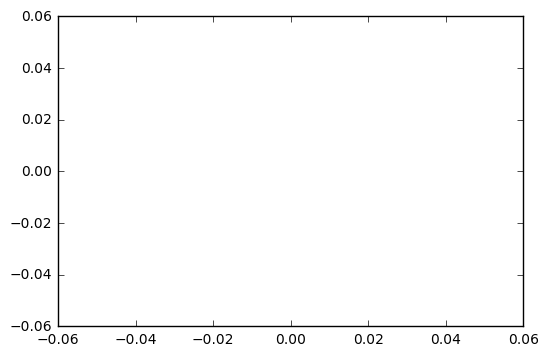

In [469]:
plt.plot(yaw_ref)

### Plot cost function

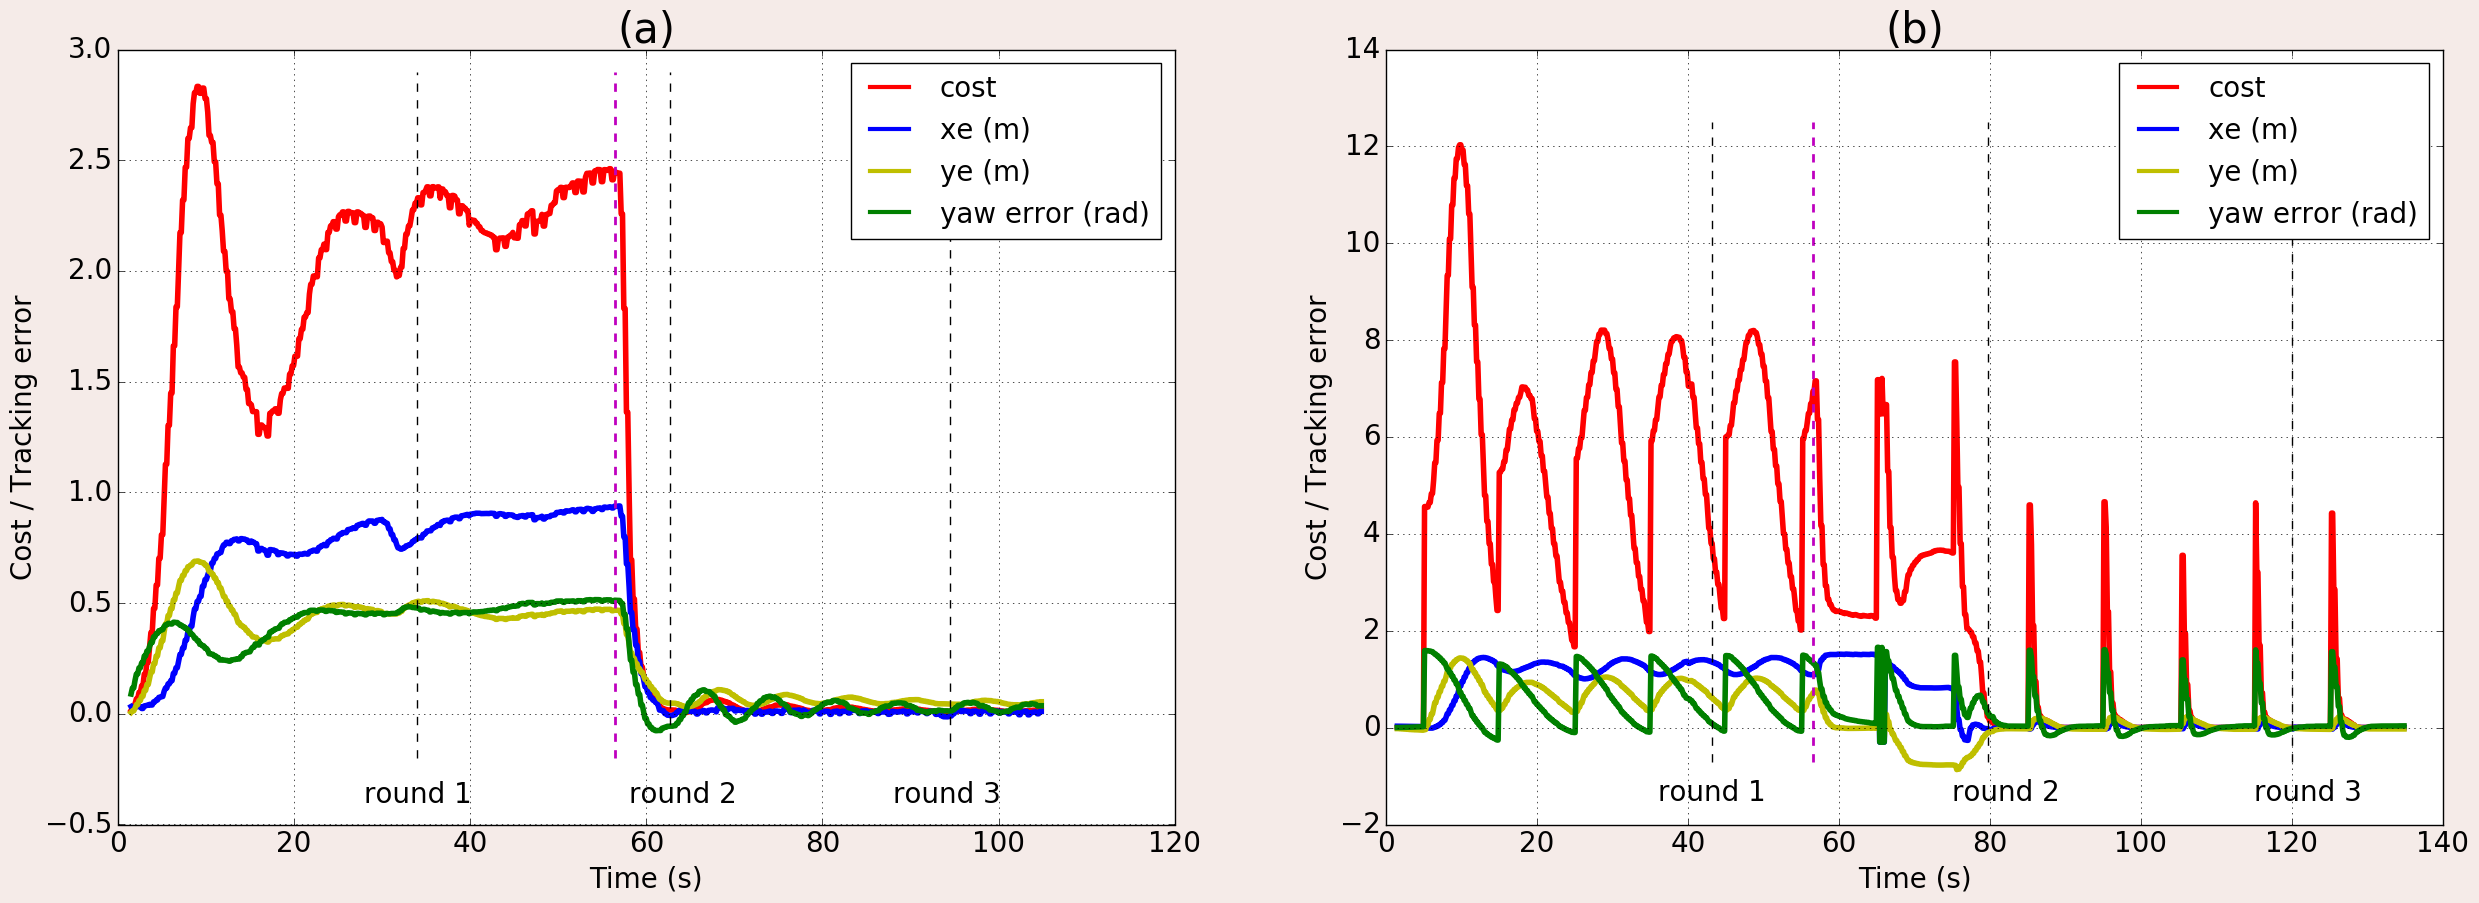

In [452]:
start = 10
end = 700
start_r = 10
end_r = 900
l_width = 4
# 1) RGB tuple:
fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,10))
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
ax.set_title('(a)', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('Time (s)', color='k', size = 20)

# 5) a named color:
ax.set_ylabel('Cost / Tracking error', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
plt.setp(lines, linewidth=4)
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)
# grid on
ax.grid(True)
# plot lines corresponding to each lap
ax.plot([34,34],[-0.2,2.9],'#000000',linestyle='--')
ax.plot([62.7,62.7],[-0.2,2.9],'#000000',linestyle='--')
ax.plot([94.5,94.5],[-0.2,2.9],'#000000',linestyle='--')
ax.plot([56.5,56.5],[-0.2,2.9],'m',linestyle='--',linewidth=2)

#Text
ax.text(28, -0.4, "round 1", size=20, rotation=0.0)
ax.text(58, -0.4, "round 2", size=20, rotation=0.0)
ax.text(88, -0.4, "round 3", size=20, rotation=0.0)


#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
leg = ax.legend(['cost', 'xe (m)', 'ye (m)', 'yaw error (rad)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


#####Square
# 4) single letter color string
ax2.set_title('(b)', color='k', size = 30)
ax2.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Cost / Tracking error', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(time_r[start_r:end_r], cost_r[start_r:end_r], 'r',time_r[start_r:end_r], xe_r[start_r:end_r], 'b', time_r[start_r:end_r], ye_r[start_r:end_r], 'y', time_r[start_r:end_r], yaw_e_r[start_r:end_r], 'g')
plt.setp(lines, linewidth=4)
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)
# grid on
ax2.grid(True)
# plot lines corresponding to each lap
ax2.plot([43.2,43.2],[-0.7,12.5],'#000000',linestyle='--')
ax2.plot([79.7,79.7],[-0.7,12.5],'#000000',linestyle='--')
ax2.plot([120,120],[-0.7,12.5],'#000000',linestyle='--')
ax2.plot([56.5,56.5],[-0.7,12.5],'m',linestyle='--',linewidth=2)

#Text
ax2.text(36, -1.5, "round 1", size=20, rotation=0.0)
ax2.text(75, -1.5, "round 2", size=20, rotation=0.0)
ax2.text(115, -1.5, "round 3", size=20, rotation=0.0)

#line widths
leg2 = ax2.legend(['cost', 'xe (m)', 'ye (m)', 'yaw error (rad)'],  prop={'size': 20})
# get the individual lines inside legend and set line width
for line in leg2.get_lines():
    line.set_linewidth(3)

for line in leg.get_lines():
    line.set_linewidth(3)

#cost_plot = plt.plot(time[start_r:end_r], cost[start_r:end_r], 'r',time[start_r:end_r], xe[start_r:end_r], 'b', time[start_r:end_r], ye[start_r:end_r], 'y', time[start_r:end_r], yaw_e[start_r:end_r], 'g')

#plt.xlabel(['Time(s)'])
plt.savefig('adaptive_cost.eps', format='eps', dpi=1000)

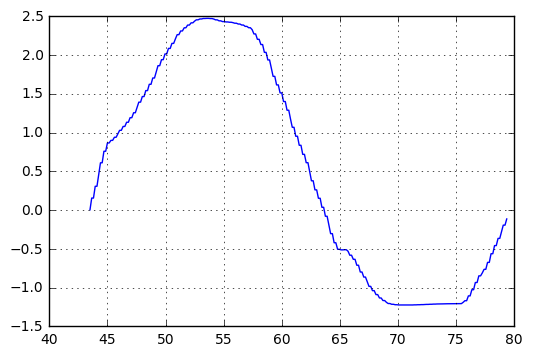

In [453]:
start = 290
end = 530
plt.plot(time_r[start:end], x_r[start:end])
#plt.plot([79.7,79.7],[-2,2])
plt.grid(True)

## Plot trajectories

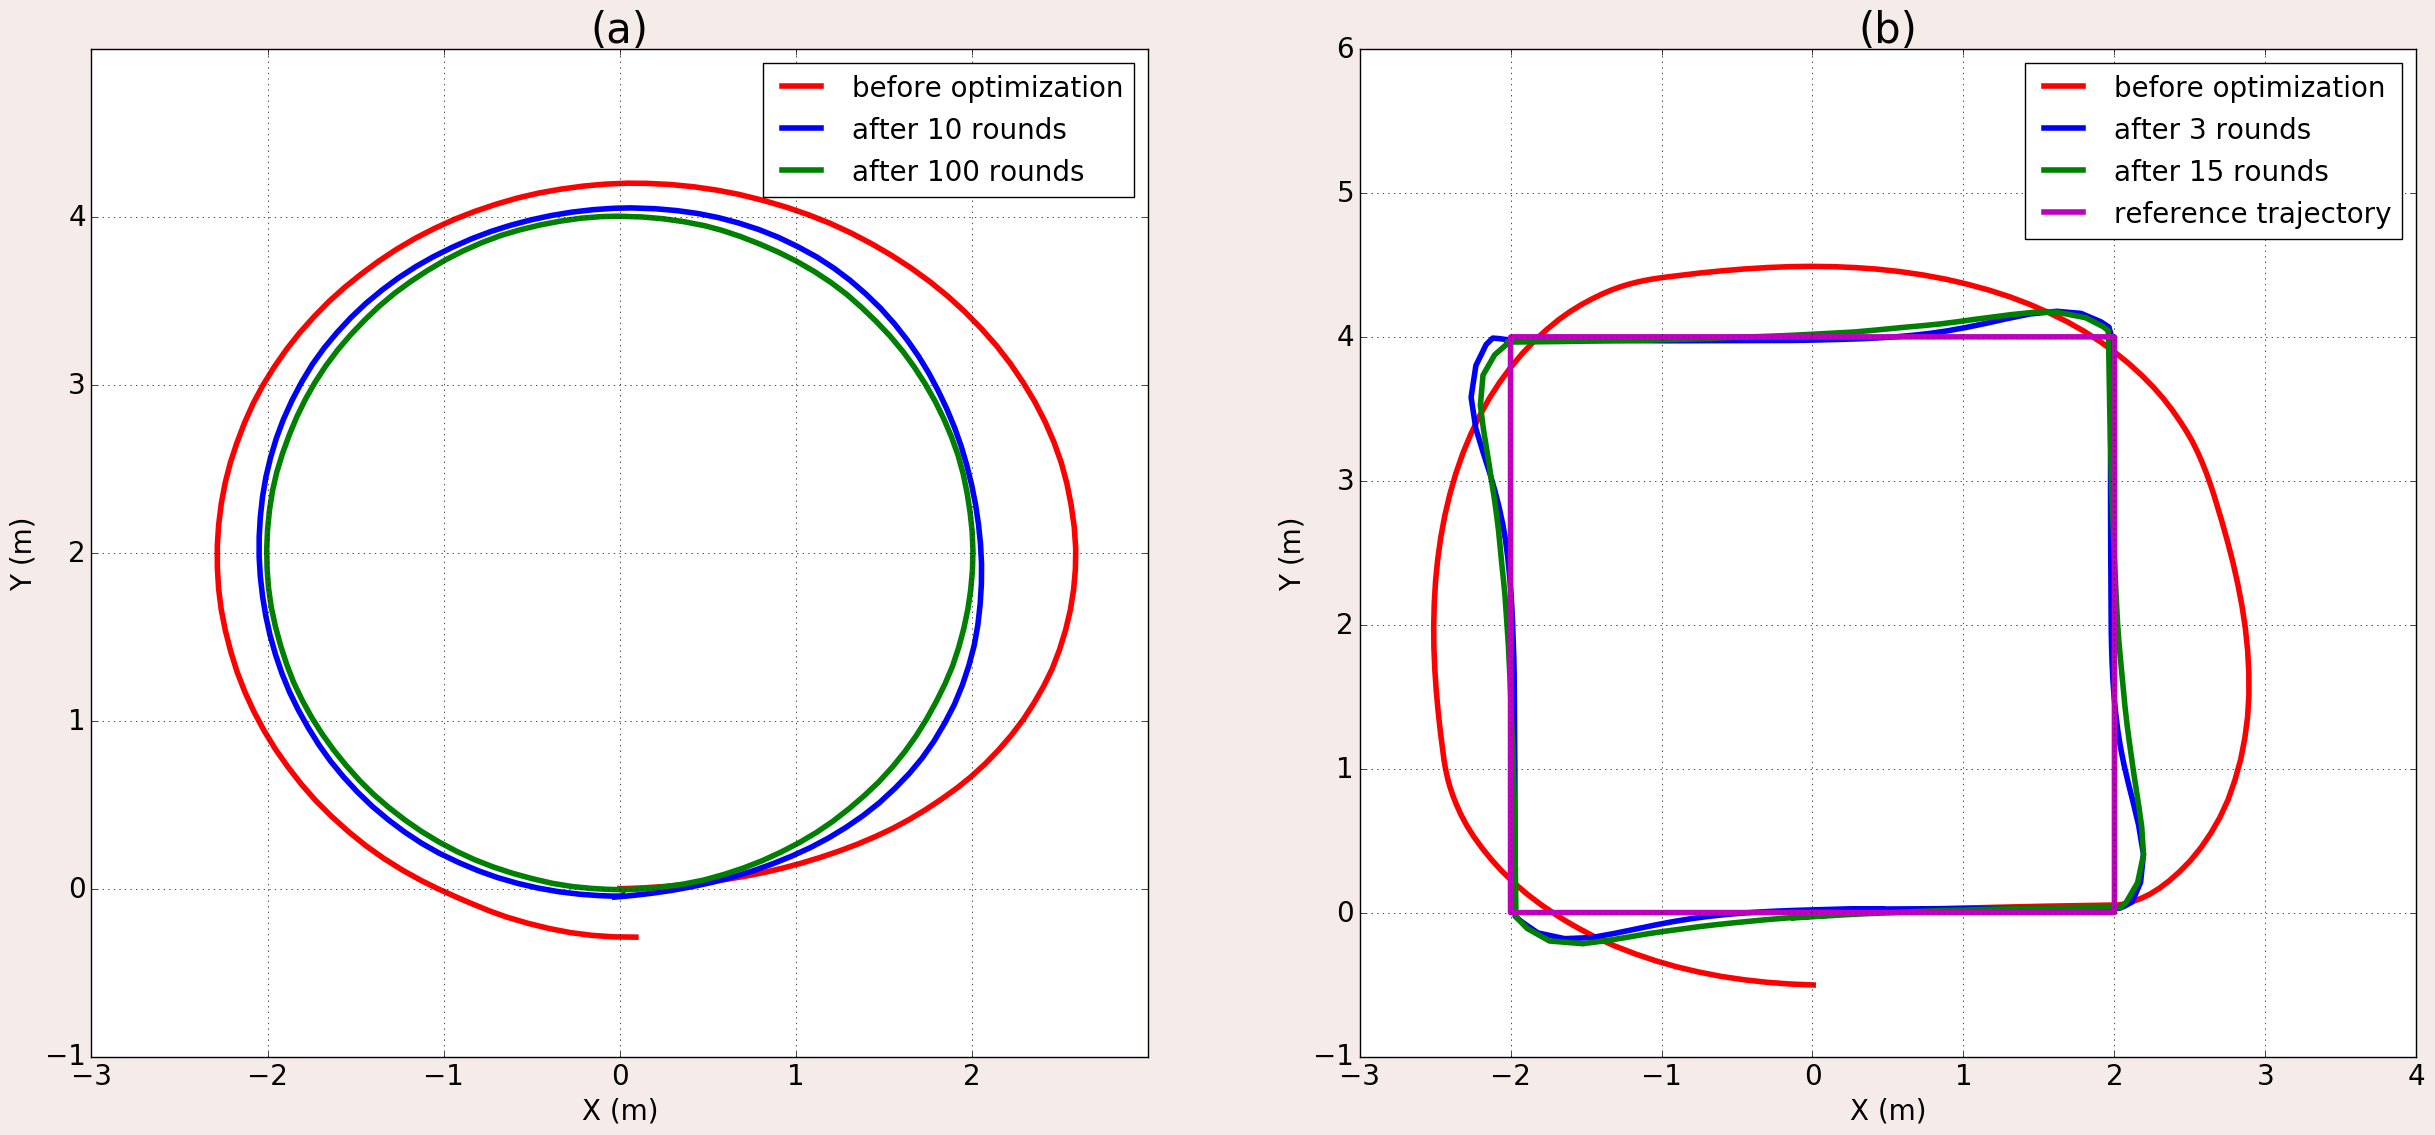

In [454]:
start1 = 0
end1 = 230
start2 = 415
end2 = 415 + 215
start3 = 28930
end3 = 29145
start1_r = 0
end1_r = 290
start2_r = 1335
end2_r = 1610
start3_r = 4000
end3_r = 4275
# 1) RGB tuple:

fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('X (m)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Y (m)', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(x[start1:end1], y[start1:end1], 'r',x[start2:end2], y[start2:end2], 'b', x[start3:end3], y[start3:end3], 'g',)
plt.setp(lines, linewidth=4)
ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['before optimization', 'after 10 rounds', 'after 100 rounds'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 4) single letter color string
ax2.set_xlabel('X (m)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Y (m)', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(x_r[start1_r:end1_r], y_r[start1_r:end1_r], 'r',x_r[start2_r:end2_r], y_r[start2_r:end2_r], 'b', x_r[start3_r:end3_r], y_r[start3_r:end3_r], 'g',x_ref_r[start3_r:end3_r], y_ref_r[start3_r:end3_r], 'm')
plt.setp(lines, linewidth=4)
ax2.xaxis.set_ticks(np.arange(-3.0,4.1,1.0))
ax2.yaxis.set_ticks(np.arange(-1.0,6.1,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['before optimization', 'after 3 rounds', 'after 15 rounds', 'reference trajectory'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('adaptive_trajectory.eps', format='eps', dpi=1000)

## Control effort

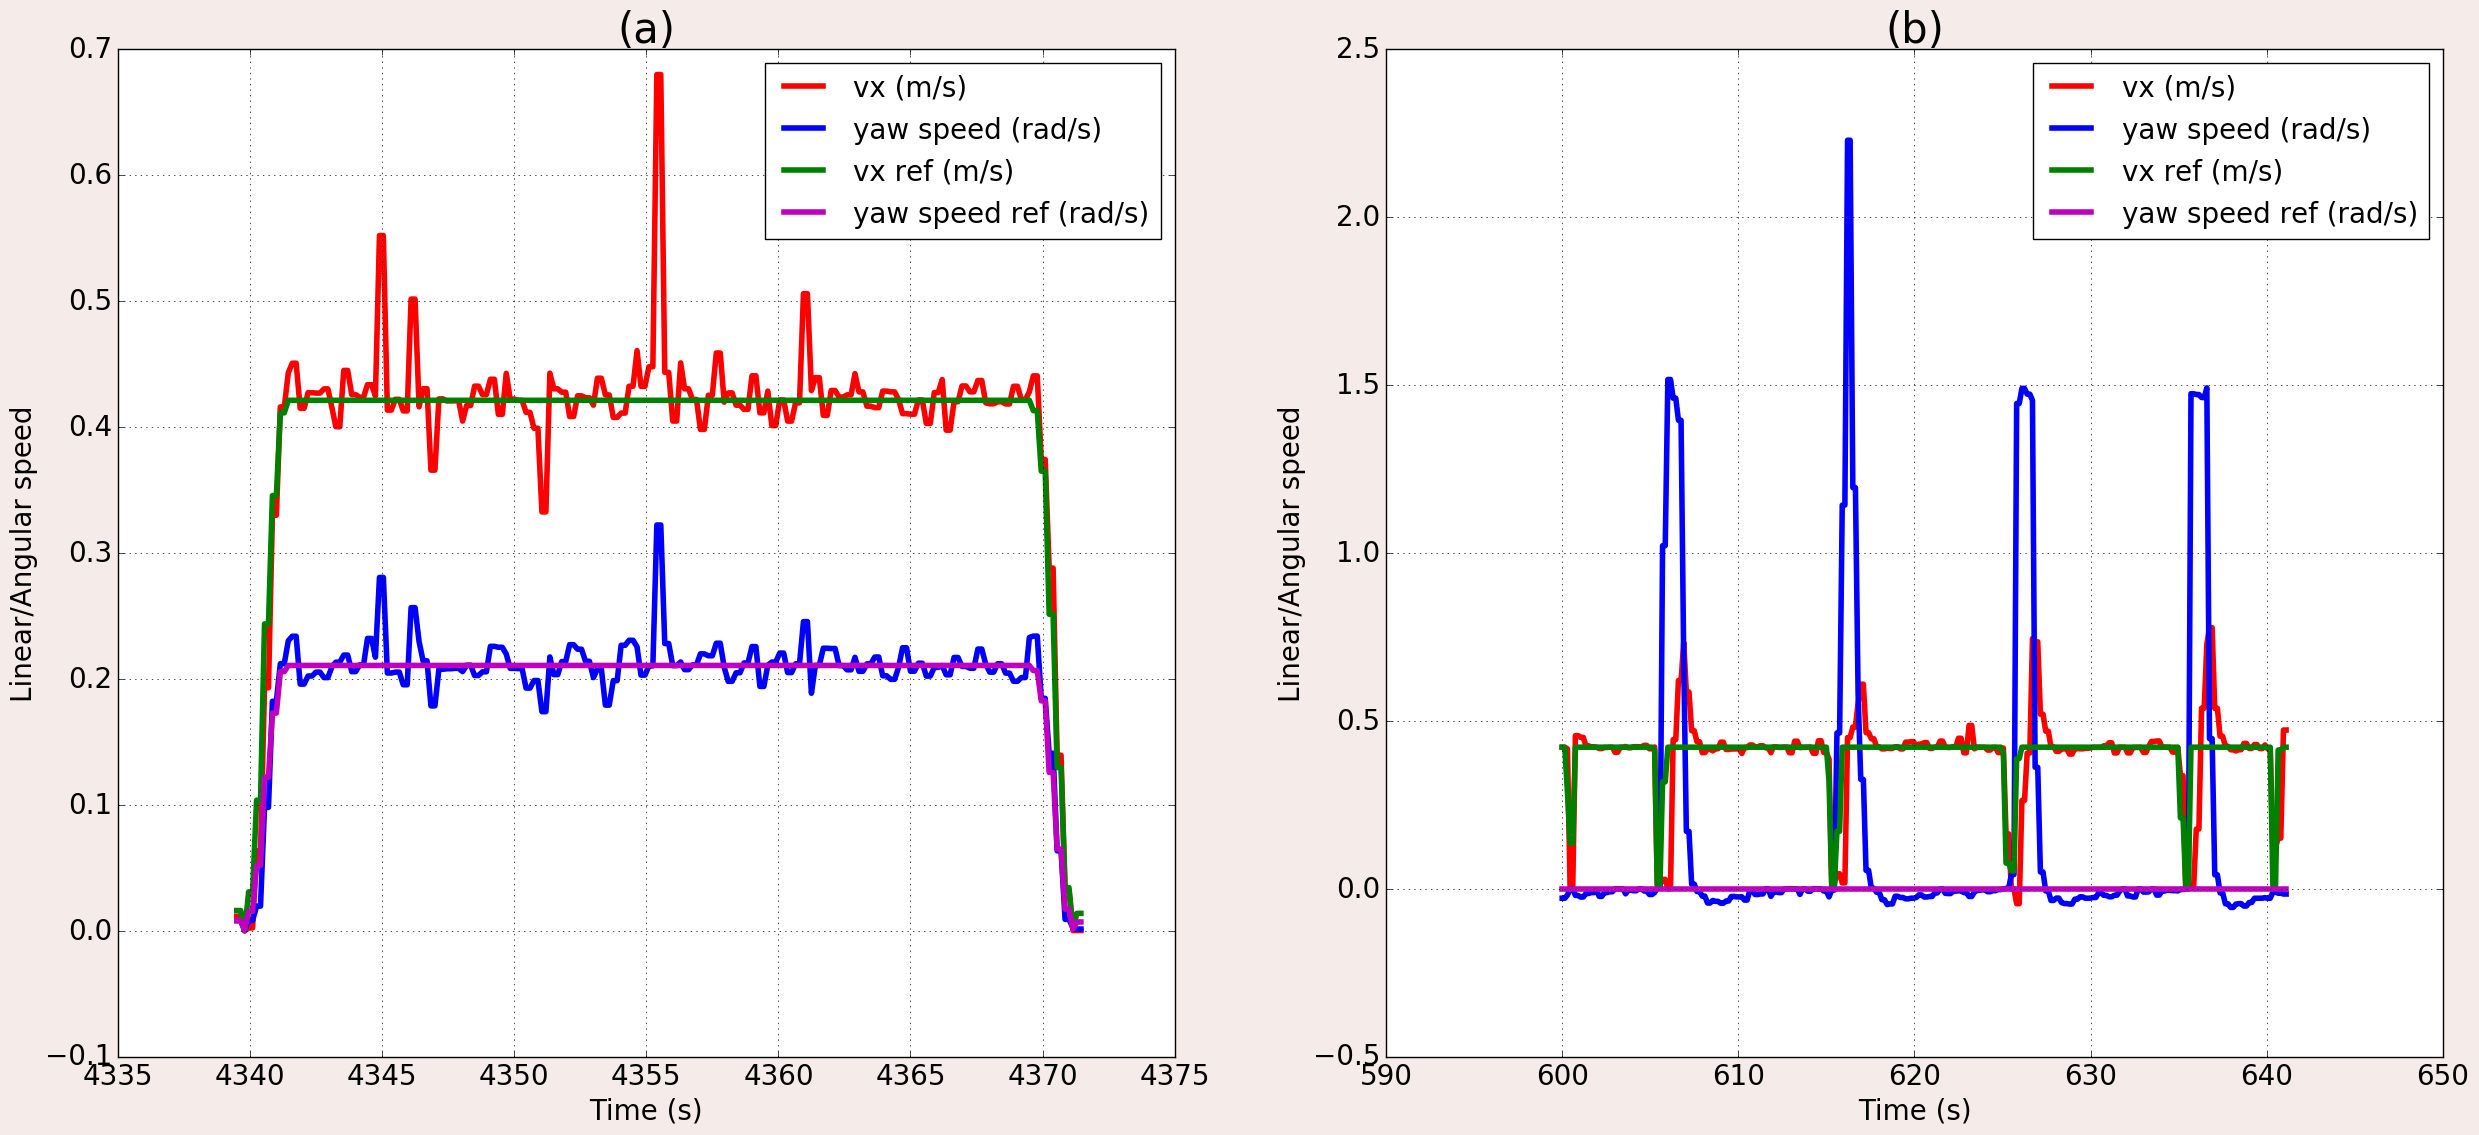

In [455]:
start1 = 0
end1 = 230
start2 = 415
end2 = 415 + 215
start3 = 28930
end3 = 29144
start1_r = 0
end1_r = 290
start2_r = 1335
end2_r = 1610
start3_r = 4000
end3_r = 4275
# 1) RGB tuple:

fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Linear/Angular speed', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(time[start3:end3], vx_local[start3:end3], 'r',time[start3:end3], d_yaw[start3:end3], 'b', time[start3:end3], vx_local_ref[start3:end3], 'g',time[start3:end3], d_yaw_ref[start3:end3], 'm')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['vx (m/s)', 'yaw speed (rad/s)', 'vx ref (m/s)', 'yaw speed ref (rad/s)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax2.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Linear/Angular speed', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(time_r[start3_r:end3_r], vx_local_r[start3_r:end3_r], 'r',time_r[start3_r:end3_r], d_yaw_r[start3_r:end3_r], 'b', time_r[start3_r:end3_r], vx_local_ref_r[start3_r:end3_r], 'g',time_r[start3_r:end3_r], d_yaw_ref_r[start3_r:end3_r], 'm')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['vx (m/s)', 'yaw speed (rad/s)', 'vx ref (m/s)', 'yaw speed ref (rad/s)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('adaptive_control_effort.eps', format='eps', dpi=1000)

## Plot parameters

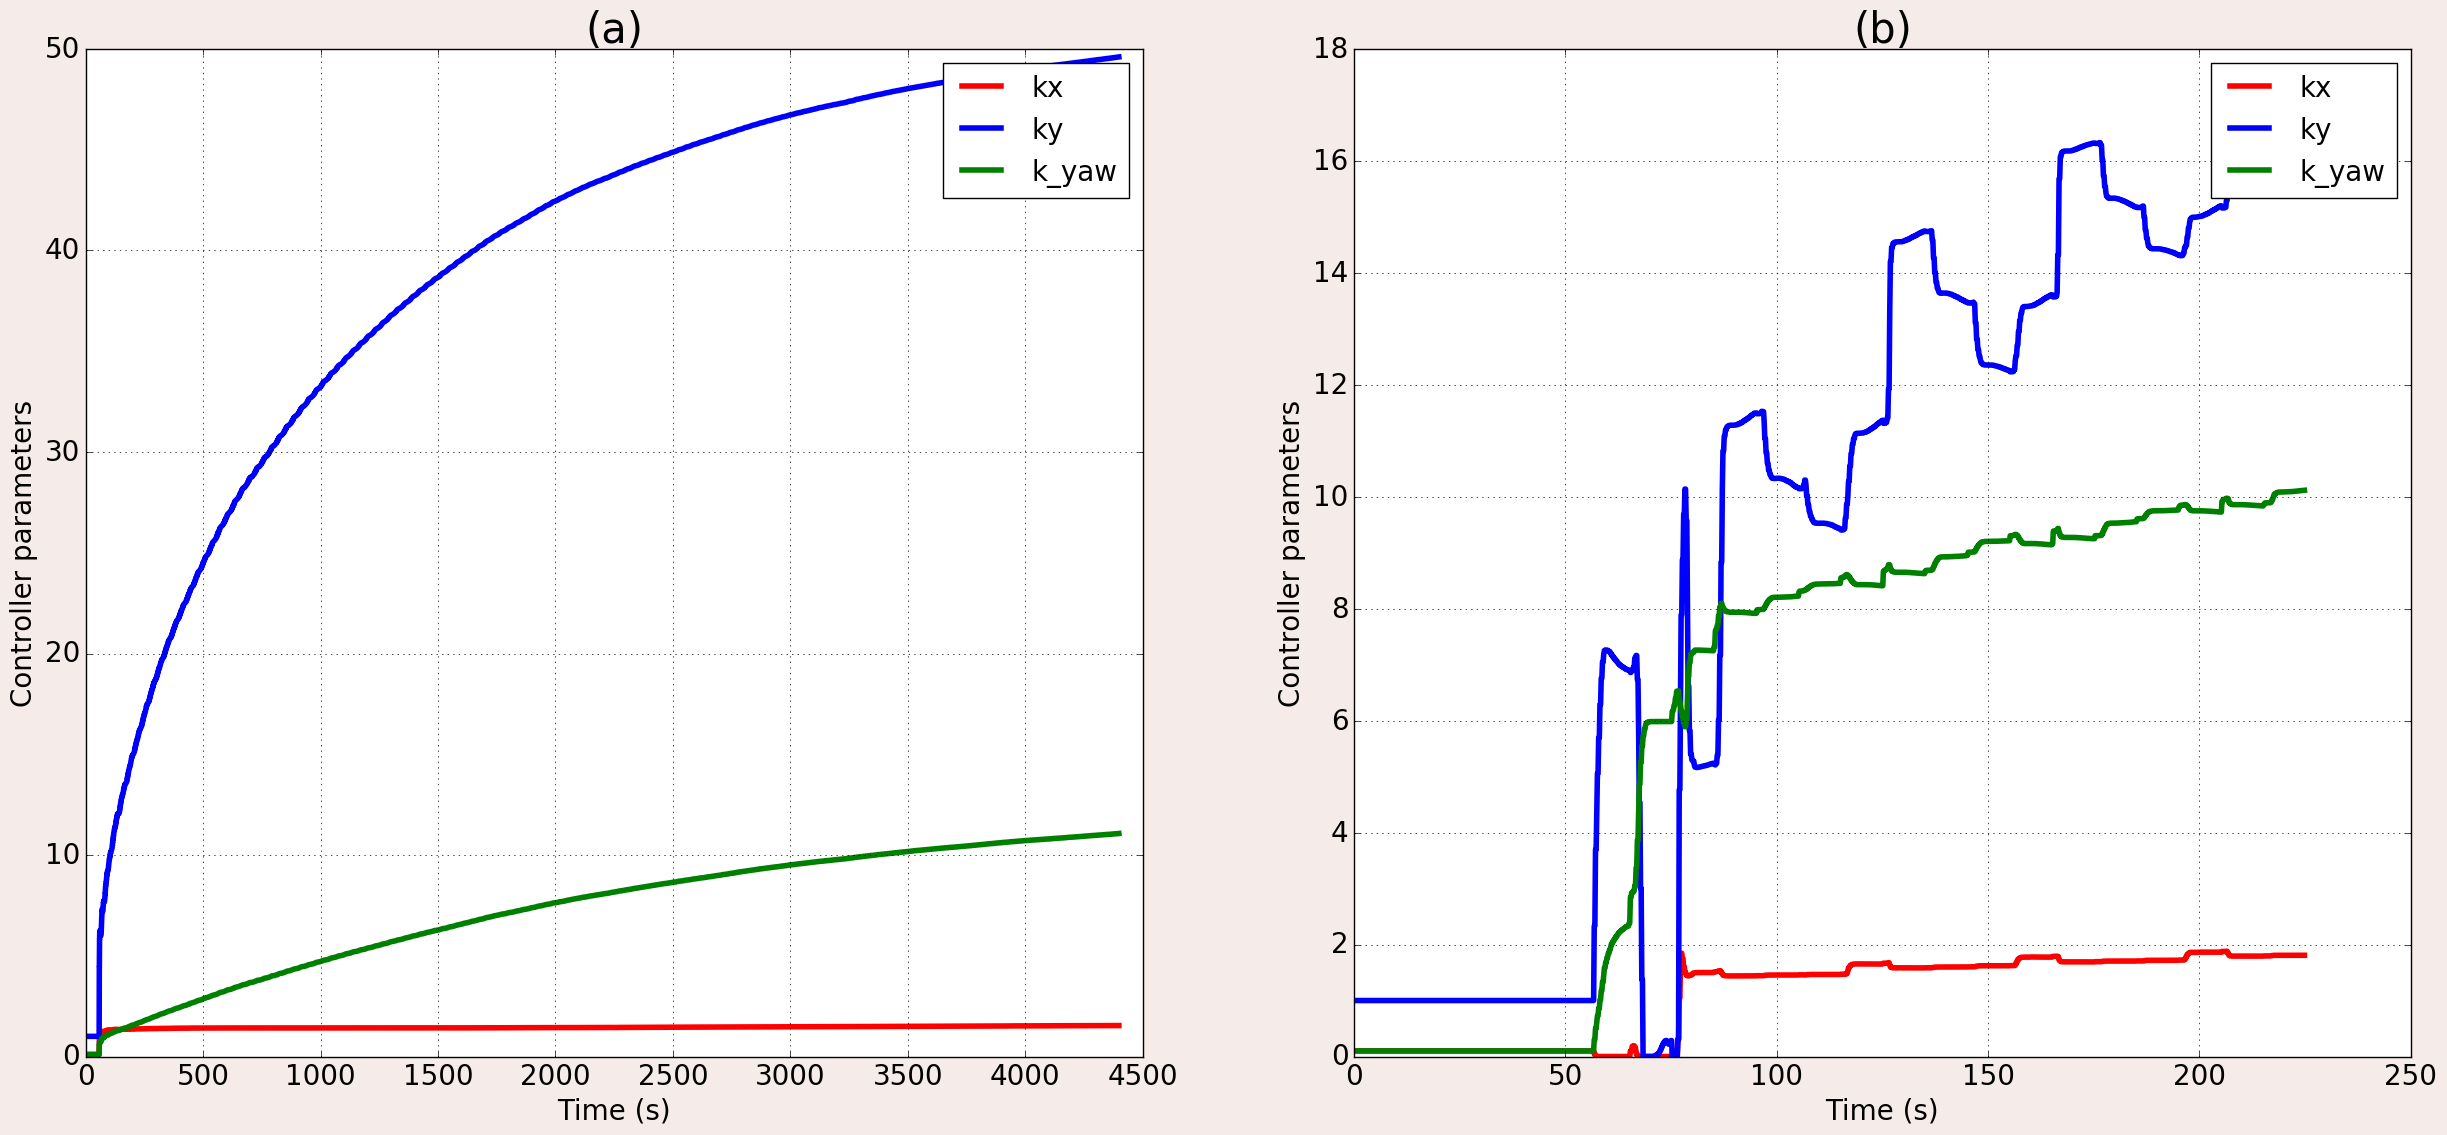

In [456]:
start1 = 0
end1 = 29328
start2 = 415
end2 = 415 + 215
start3 = 28930
end3 = 29145
start1_r = 0
end1_r = 1500
start2_r = 1335
end2_r = 1610
start3_r = 4000
end3_r = 4275

fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Controller parameters', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(time[start1:end1], kx[start1:end1], 'r',time[start1:end1], ky[start1:end1], 'b', time[start1:end1], kt[start1:end1], 'g',)
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['kx', 'ky', 'k_yaw'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


ax2.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Controller parameters', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(time_r[start1_r:end1_r], kx_r[start1_r:end1_r], 'r', time_r[start1_r:end1_r], ky_r[start1_r:end1_r], 'b', time_r[start1_r:end1_r], kt_r[start1_r:end1_r], 'g')
plt.setp(lines, linewidth=4)
#ax2.xaxis.set_ticks(np.arange(-3.0,4.0,0.5))
#ax2.yaxis.set_ticks(np.arange(-1.0,6.0,0.5))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['kx', 'ky', 'k_yaw'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('adaptive_parameters.eps', format='eps', dpi=1000)

# =================== SMC ==========================

In [457]:
from numpy import diff
time, x, y, yaw, d_x, d_y, d_yaw, x_ref, y_ref, yaw_ref, d_x_ref, d_y_ref, d_yaw_ref, xe, ye, yaw_e, vx_local, vx_local_ref, vc, wc = df_smc.time.values, df_smc.x.values, df_smc.y.values, df_smc.yaw.values, df_smc.d_x.values, df_smc.d_y.values, df_smc.d_yaw.values, df_smc.x_ref.values, df_smc.y_ref.values, df_smc.yaw_ref.values, df_smc.d_x_ref.values, df_smc.d_y_ref.values, df_smc.d_yaw_ref.values, df_smc.xe.values, df_smc.ye.values, df_smc.yaw_e.values, df_smc.vx_local.values, df_smc.vx_local_ref.values, df_smc.vc.values, df_smc.wc.values

time_r, x_r, y_r, yaw_r, d_x_r, d_y_r, d_yaw_r, x_ref_r, y_ref_r, yaw_ref_r, d_x_ref_r, d_y_ref_r, d_yaw_ref_r, xe_r, ye_r, yaw_e_r, vx_local_r, vx_local_ref_r, vc_r, wc_r = df_smc_rec.time.values, df_smc_rec.x.values, df_smc_rec.y.values, df_smc_rec.yaw.values, df_smc_rec.d_x.values, df_smc_rec.d_y.values, df_smc_rec.d_yaw.values, df_smc_rec.x_ref.values, df_smc_rec.y_ref.values, df_smc_rec.yaw_ref.values, df_smc_rec.d_x_ref.values, df_smc_rec.d_y_ref.values, df_smc_rec.d_yaw_ref.values, df_smc_rec.xe.values, df_smc_rec.ye.values, df_smc_rec.yaw_e.values, df_smc_rec.vx_local.values, df_smc_rec.vx_local_ref.values, df_smc_rec.vc.values, df_smc_rec.wc.values

print(time.shape)
print(time_r.shape)
time = time-time[0]
time_r = time_r-time_r[0]
#clip yaw_e
yaw_e_r = yaw_e_r.clip(min=-0.3)
xe_r = xe_r.clip(min=-0.3)

(6288,)
(14299,)


(6288,)
(14299,)


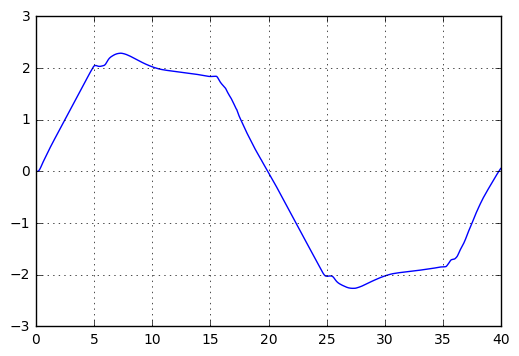

In [458]:
start = 0
end = 2000

plt.plot(time_r[start:end], x_r[start:end])
#plt.plot([79.7,79.7],[-2,2])
plt.grid(True)

##get derivatives

d_xe = diff(xe)/diff(time)
d_xe_r = diff(xe_r)/diff(time_r)

d_xe = np.insert(d_xe, 0, 0., axis=0)
d_xe_r = np.insert(d_xe_r, 0, 0., axis=0)

print(d_xe.shape)
print(d_xe_r.shape)

## Plot trajectories

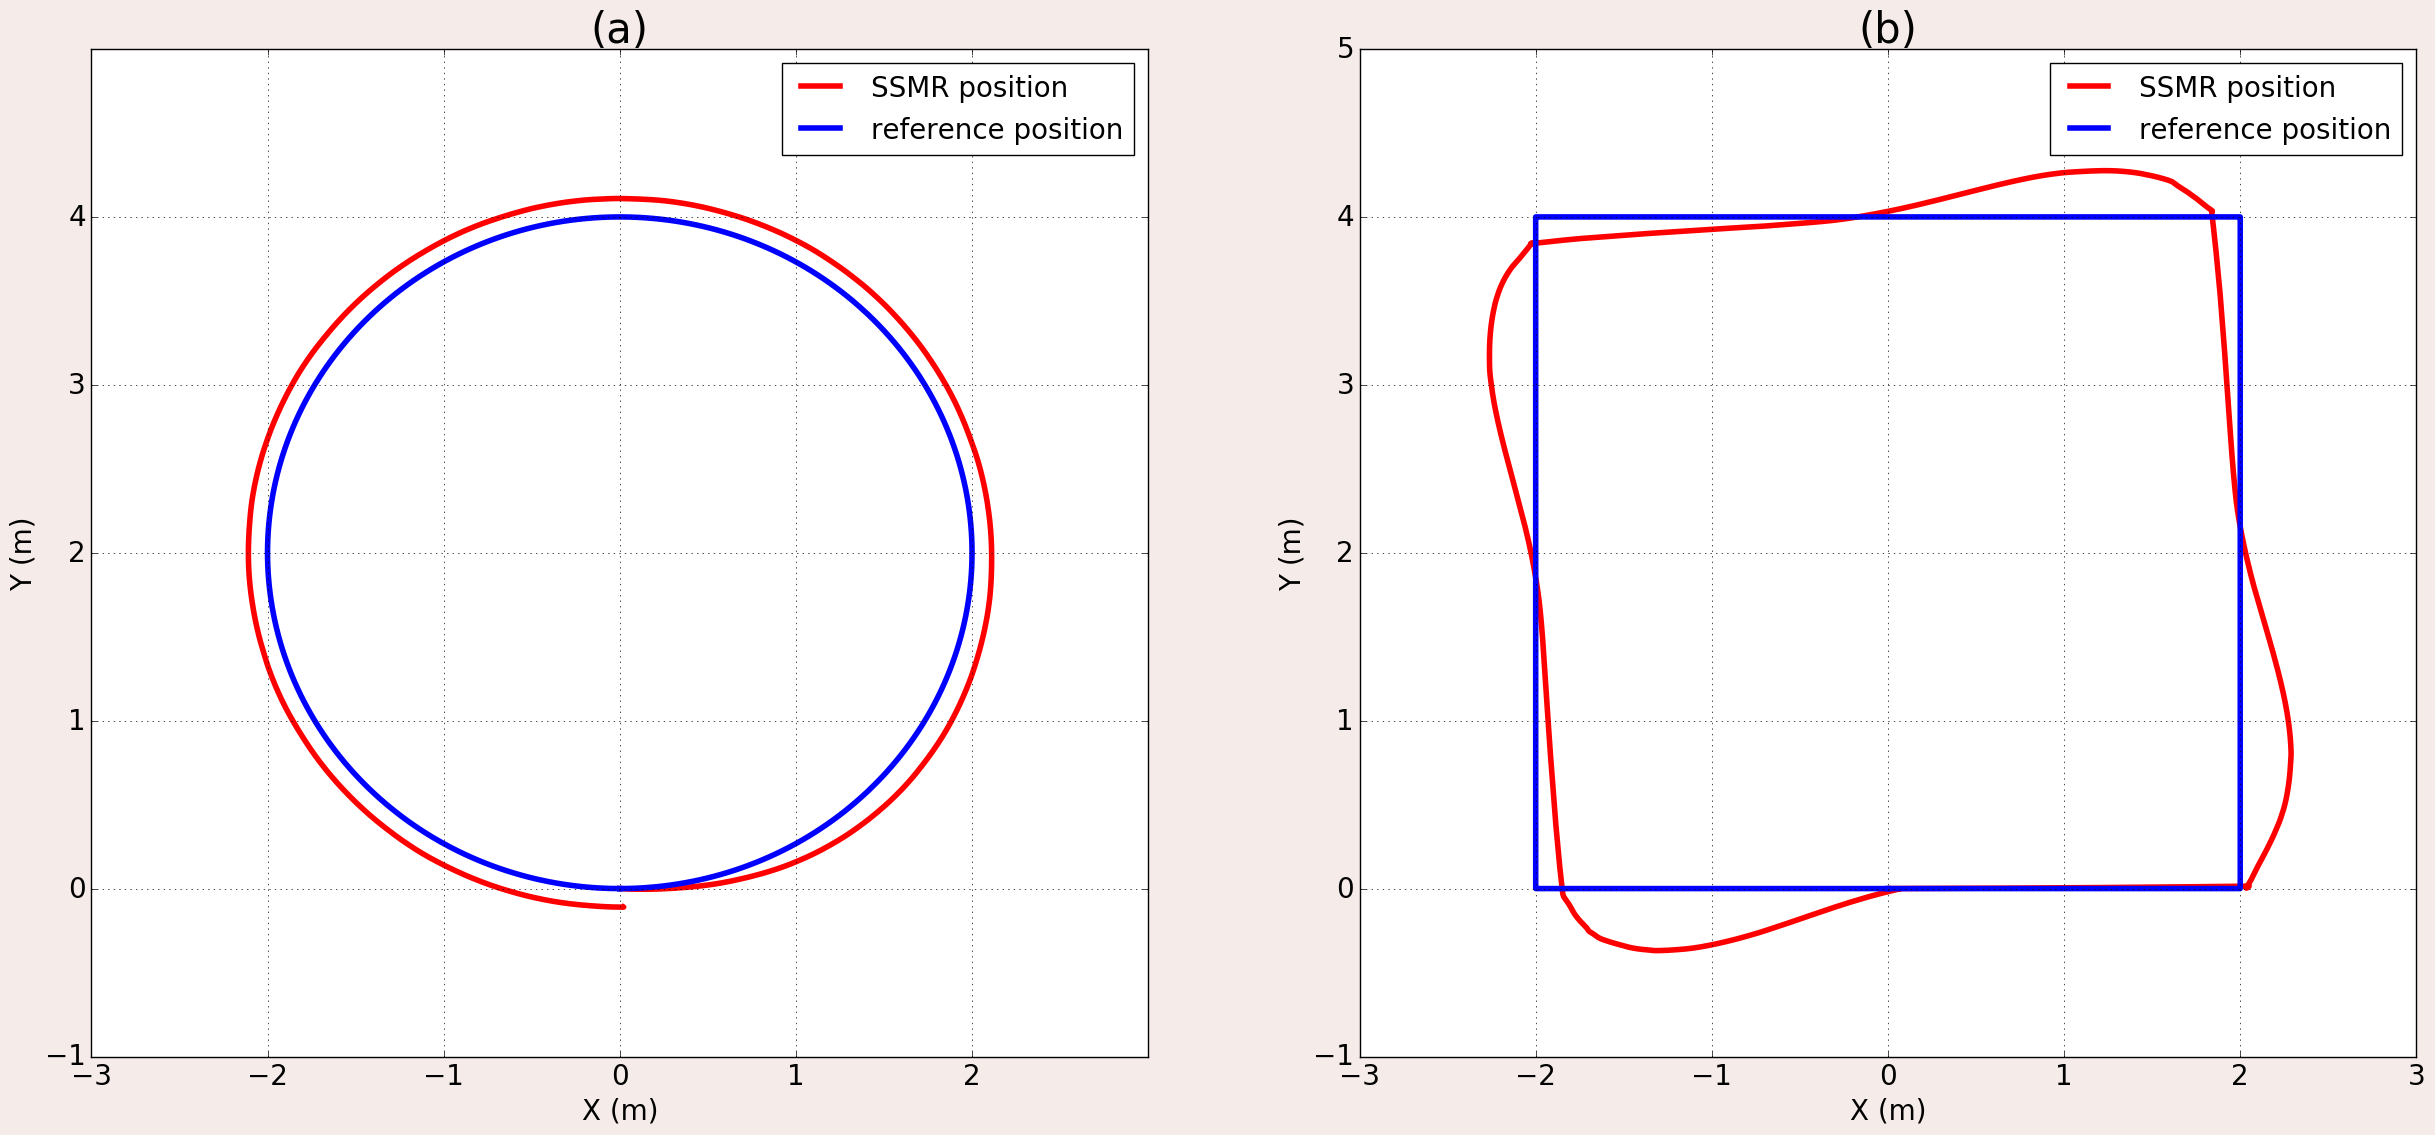

In [459]:
start1 = 0
end1 = 1570

start1_r = 0
end1_r = 2000
# 1) RGB tuple:

fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('X (m)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Y (m)', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(x[start1:end1], y[start1:end1], 'r',x_ref[start1:end1], y_ref[start1:end1], 'b')
plt.setp(lines, linewidth=4)
ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['SSMR position' , 'reference position'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 4) single letter color string
ax2.set_xlabel('X (m)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Y (m)', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(x_r[start1_r:end1_r], y_r[start1_r:end1_r], 'r',x_ref_r[start1_r:end1_r], y_ref_r[start1_r:end1_r], 'b')
plt.setp(lines, linewidth=4)
ax2.xaxis.set_ticks(np.arange(-3.0,4.0,1.0))
ax2.yaxis.set_ticks(np.arange(-1.0,6.0,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['SSMR position' , 'reference position'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('smc_trajectory.eps', format='eps', dpi=1000)

## Control effort

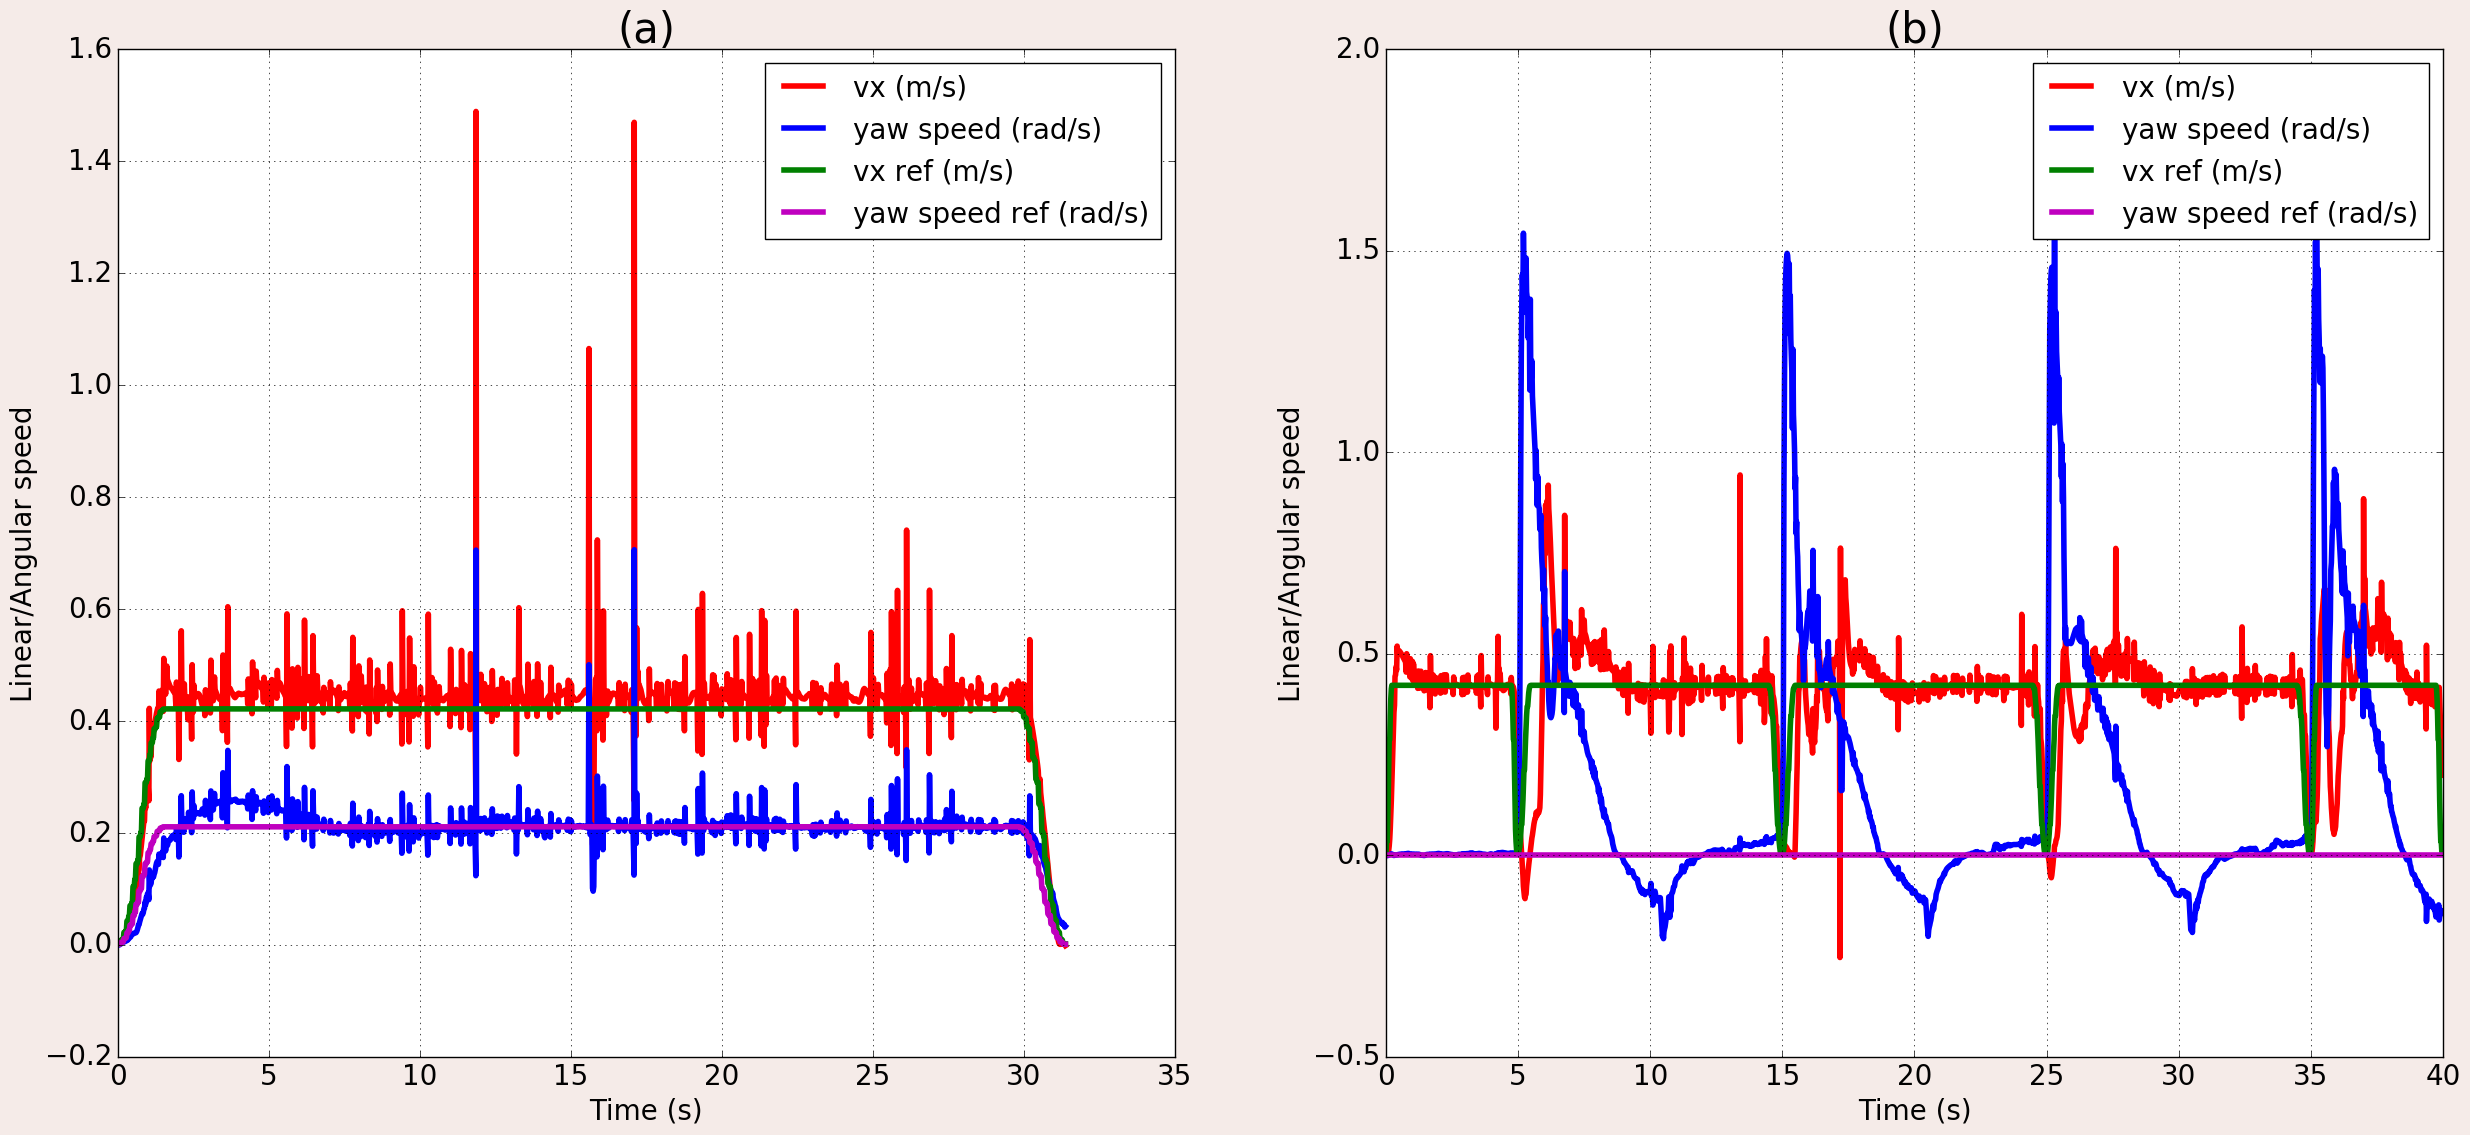

In [460]:
fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Linear/Angular speed', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(time[start1:end1], vx_local[start1:end1], 'r',time[start1:end1], d_yaw[start1:end1], 'b', time[start1:end1], vx_local_ref[start1:end1], 'g',time[start1:end1], d_yaw_ref[start1:end1], 'm')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['vx (m/s)', 'yaw speed (rad/s)', 'vx ref (m/s)', 'yaw speed ref (rad/s)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax2.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Linear/Angular speed', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(time_r[start1_r:end1_r], vx_local_r[start1_r:end1_r], 'r',time_r[start1_r:end1_r], d_yaw_r[start1_r:end1_r], 'b', time_r[start1_r:end1_r], vx_local_ref_r[start1_r:end1_r], 'g',time_r[start1_r:end1_r], d_yaw_ref_r[start1_r:end1_r], 'm')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['vx (m/s)', 'yaw speed (rad/s)', 'vx ref (m/s)', 'yaw speed ref (rad/s)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('smc_control_effort.eps', format='eps', dpi=1000)

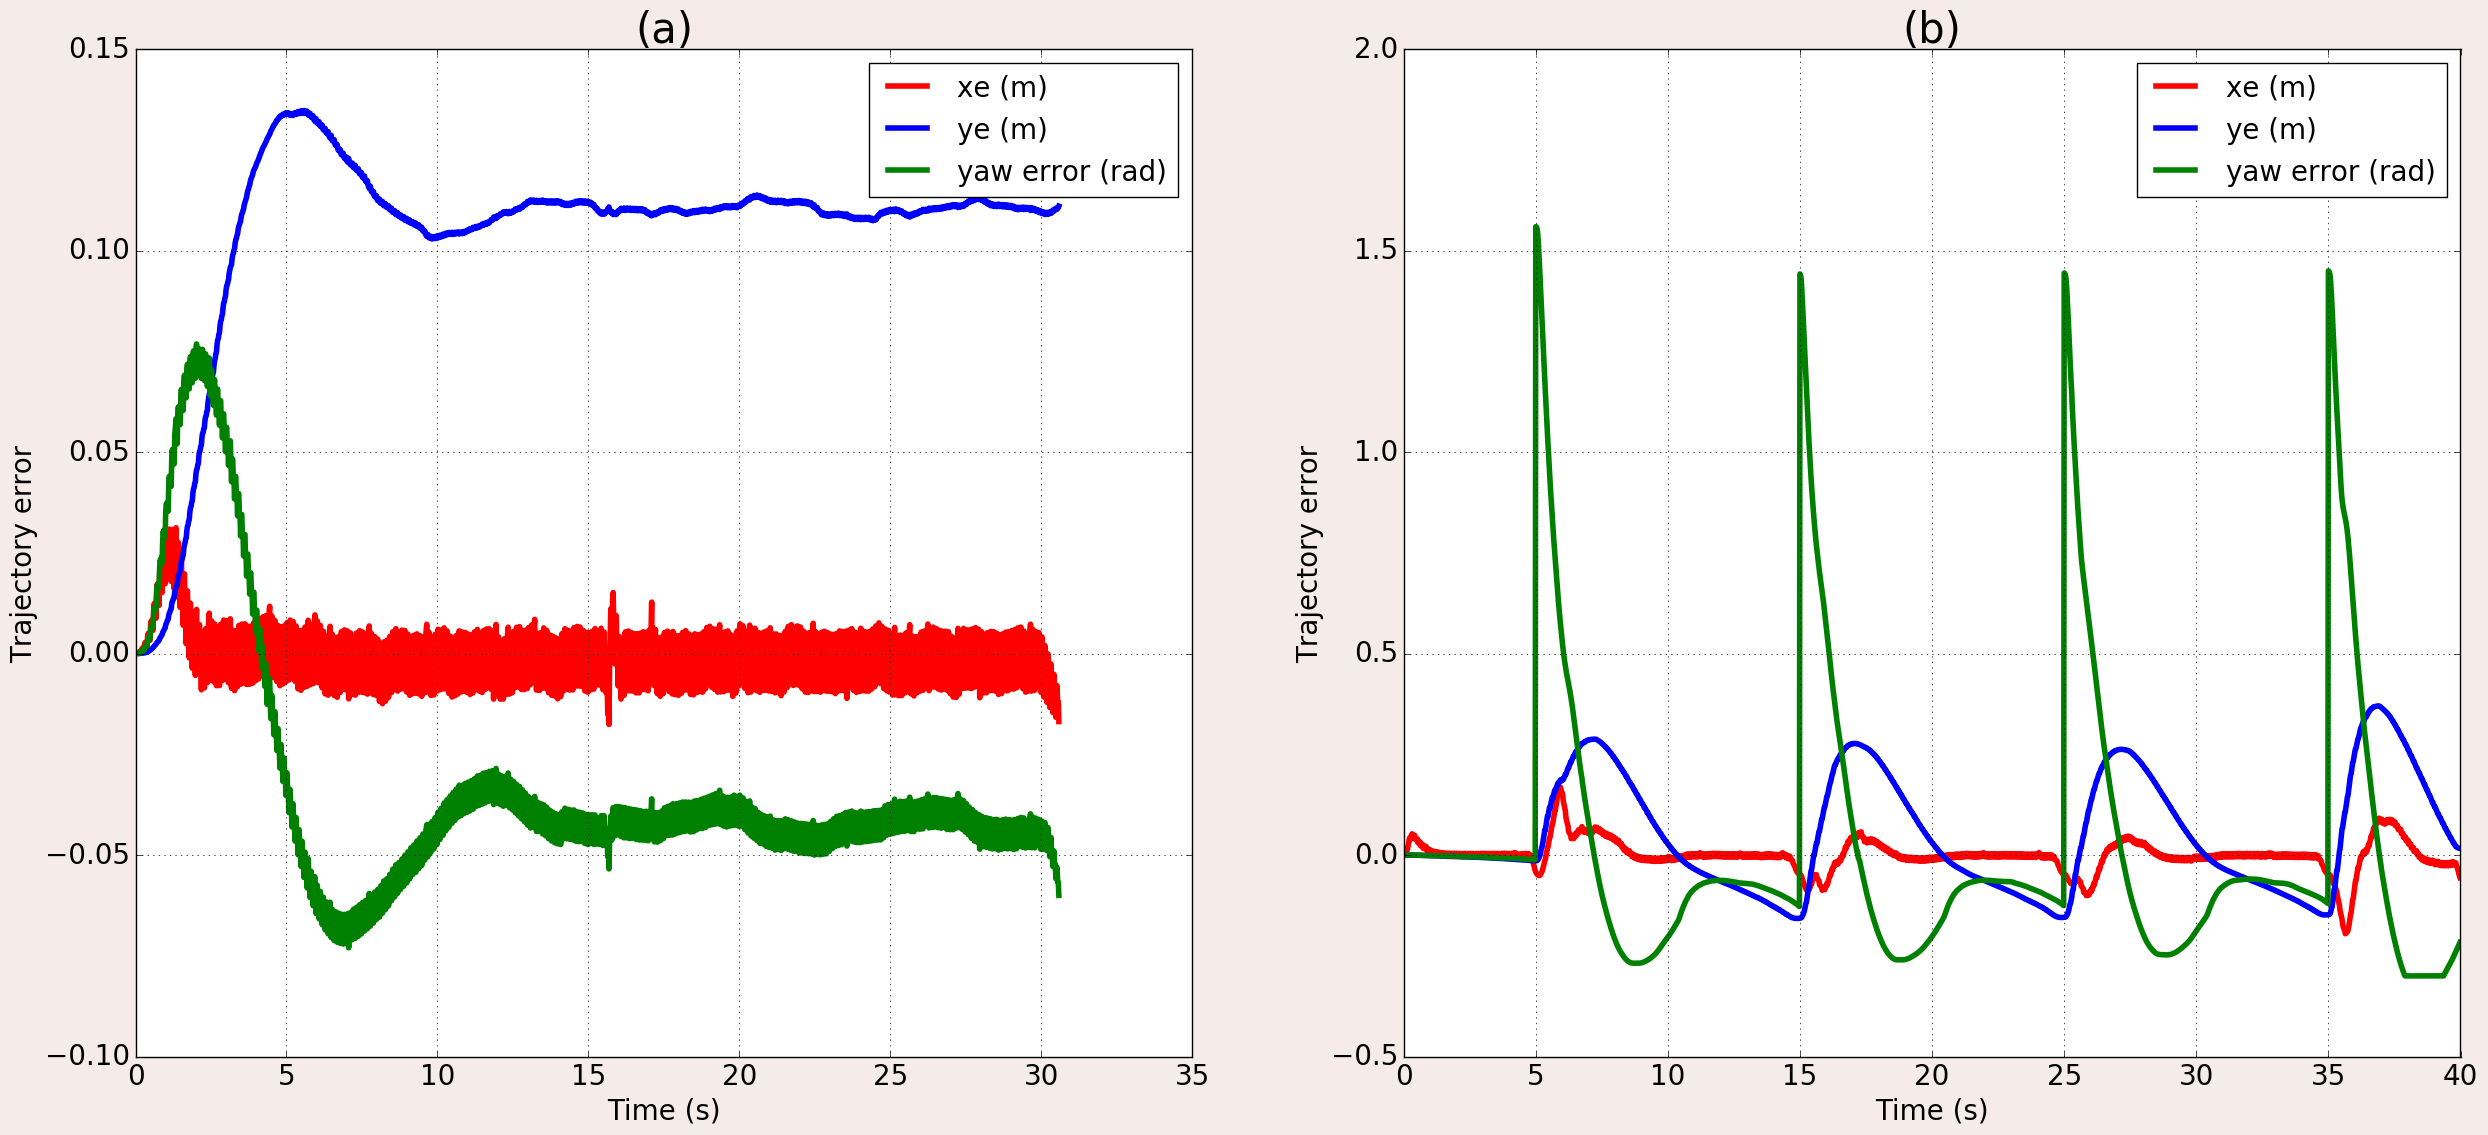

In [461]:
fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
end1 = 1530
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('Trajectory error', color='k', size = 20)
# 6) a named xkcd color:
lines = ax.plot(time[start1:end1], xe[start1:end1], 'r',time[start1:end1], ye[start1:end1], 'b', time[start1:end1], yaw_e[start1:end1], 'g')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['xe (m)', 'ye (m)', 'yaw error (rad)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax2.set_xlabel('Time (s)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('Trajectory error', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(time_r[start1_r:end1_r], xe_r[start1_r:end1_r], 'r',time_r[start1_r:end1_r], ye_r[start1_r:end1_r], 'b', time_r[start1_r:end1_r], yaw_e_r[start1_r:end1_r], 'g')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['xe (m)', 'ye (m)', 'yaw error (rad)'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('smc_error.eps', format='eps', dpi=1000)

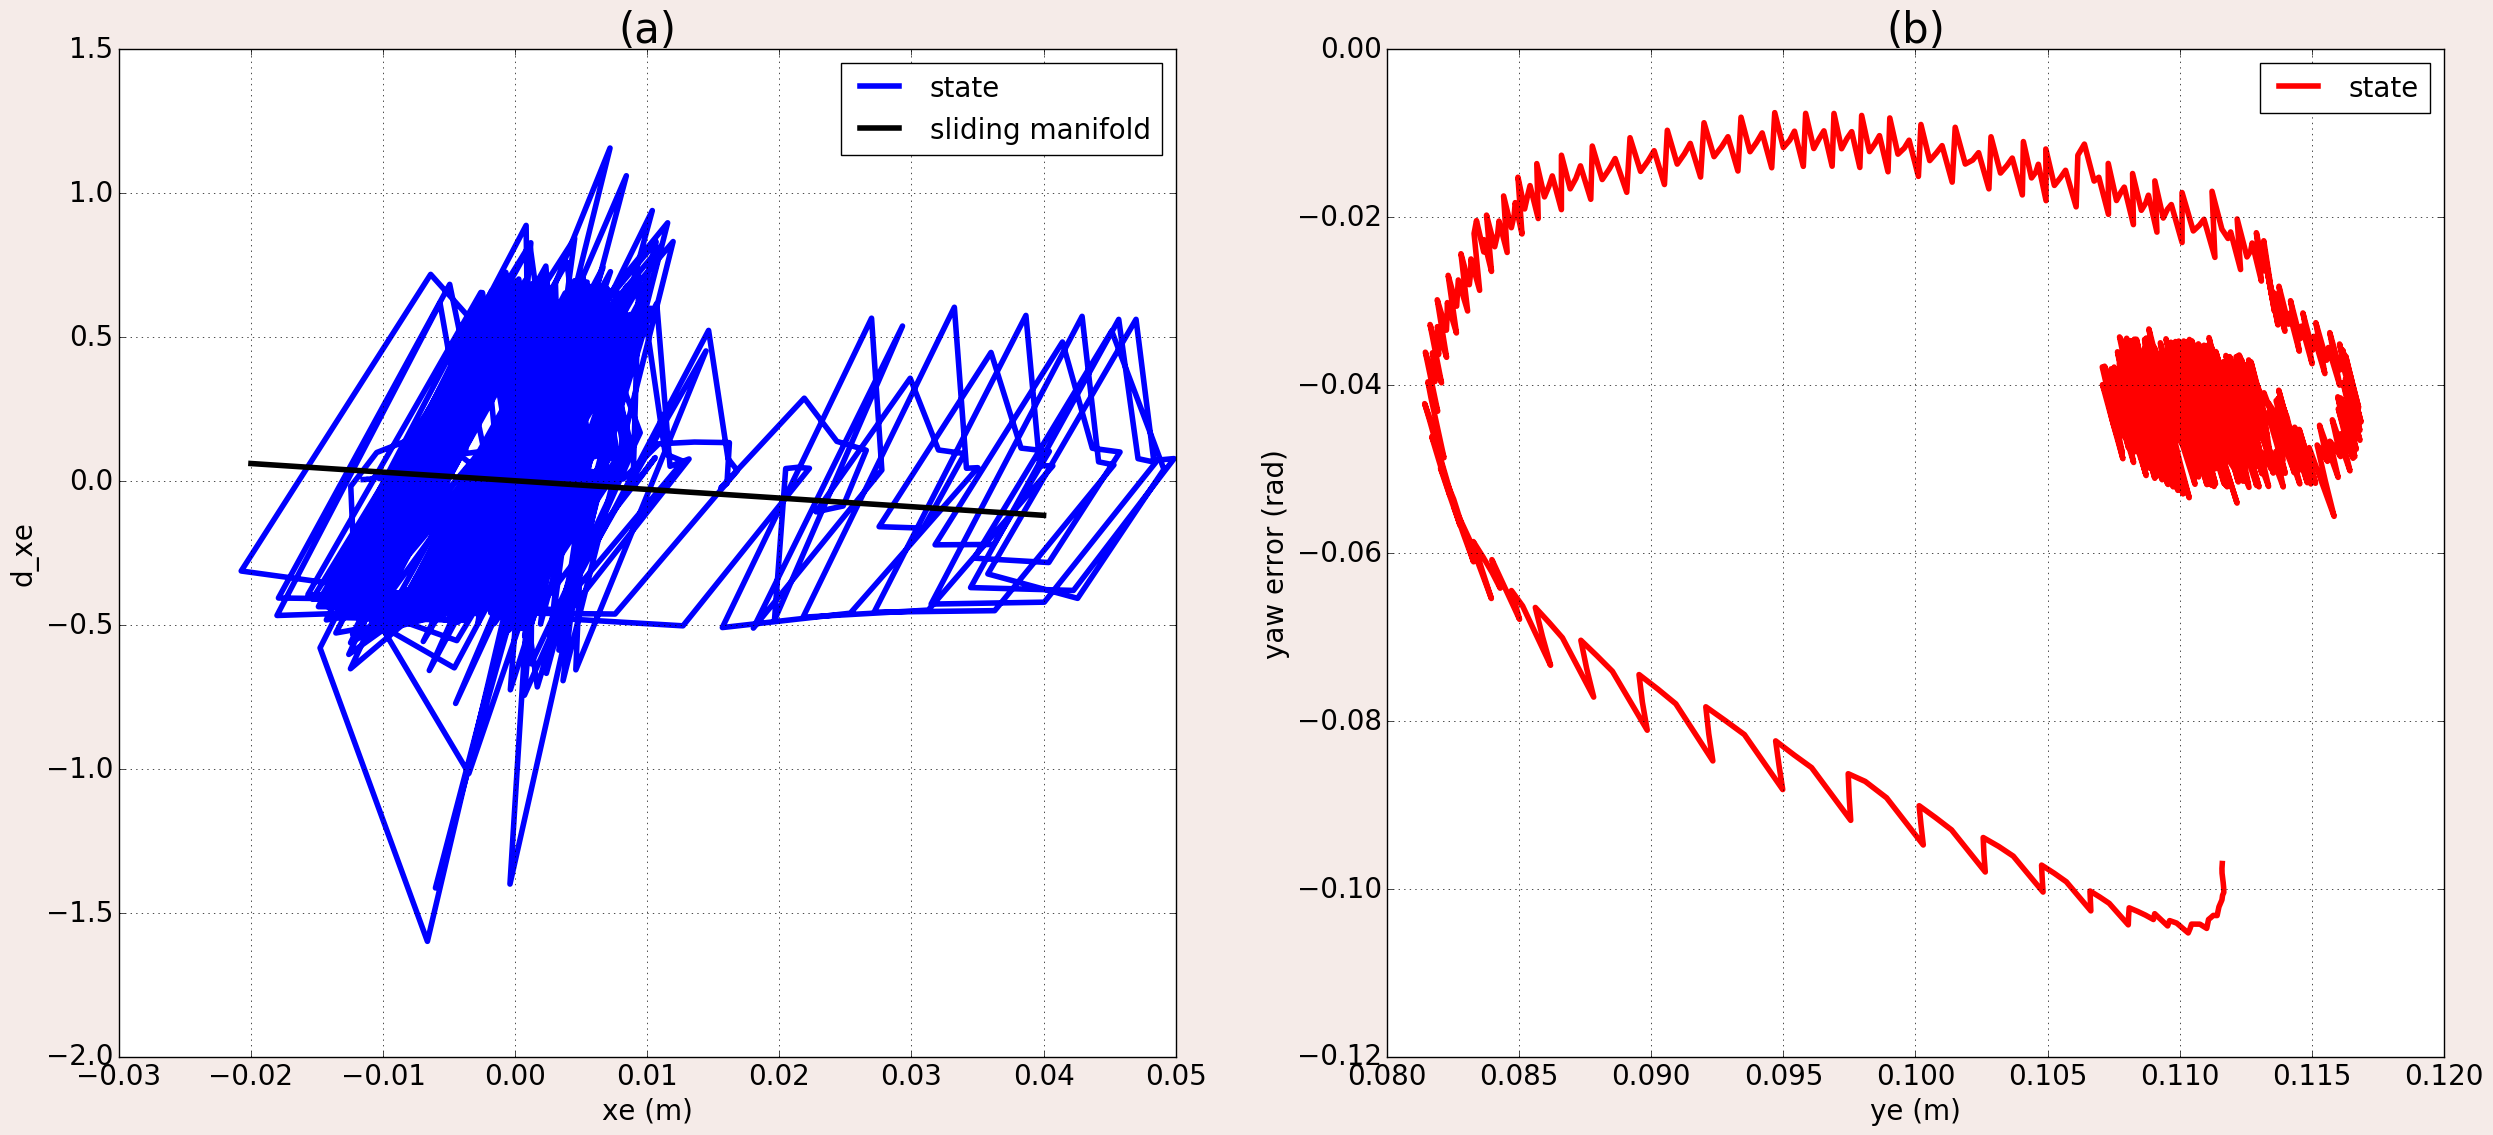

In [462]:
start1 = 1570
end1 = 1570*2-100

start1_r = 2000
end1_r = 2000*2-1000
# 1) RGB tuple:
d_xe = d_xe.clip(min=-1.6)

fig, (ax, ax2) = plt.subplots(1,2,facecolor=(.96, .92, .91),figsize=(30,13))
ax.set_title('(a)', color='k', size = 30)
ax2.set_title('(b)', color='k', size = 30)
# 2) hex string:
#ax.set_facecolor('#eafff5')
# 3) gray level string:
#ax.set_title('Cost function and trajectory tracking error - circular trajectory', color='k', size = 30)
# 4) single letter color string
ax.set_xlabel('xe (m)', color='k', size = 20)
# 5) a named color:
ax.set_ylabel('d_xe', color='k', size = 20)
# 6) a named xkcd colo:
lines = ax.plot(xe[start1:end1], d_xe[start1:end1], 'b', [-0.01*2,0.01*4],[0.03*2,-0.03*4], 'k')
plt.setp(lines, linewidth=4)
#ax.xaxis.set_ticks(np.arange(-3.0,3.0,1.0))
#ax.yaxis.set_ticks(np.arange(-1.0,5.0,1.0))
# 8) tab notation:
ax.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax.legend(['state', 'sliding manifold'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])


# 4) single letter color string
ax2.set_xlabel('ye (m)', color='k', size = 20)
# 5) a named color:
ax2.set_ylabel('yaw error (rad)', color='k', size = 20)
# 6) a named xkcd color:
lines = ax2.plot(ye[start1:end1], yaw_e[start1:end1], 'r')
plt.setp(lines, linewidth=4)
#ax2.xaxis.set_ticks(np.arange(-3.0,4.0,1.0))
#ax2.yaxis.set_ticks(np.arange(-1.0,6.0,1.0))
# 8) tab notation:
ax2.tick_params(labelcolor='k', labelsize = 20)

# grid on
ax2.grid(True)

#cost_plot = plt.plot(time[start:end], cost[start:end], 'r',time[start:end], xe[start:end], 'b', time[start:end], ye[start:end], 'y', time[start:end], yaw_e[start:end], 'g')
ax2.legend(['state'],  prop={'size': 20})
#plt.xlabel(['Time(s)'])
plt.savefig('smc_sliding_manifod.eps', format='eps', dpi=1000)

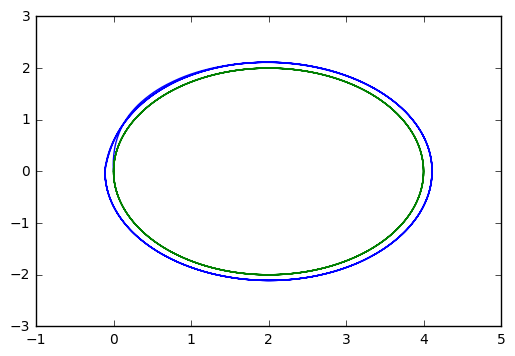

In [463]:
plt.plot(y, x, 'b', y_ref, x_ref, 'g') 

In [36]:
df_imu = pd.read_csv("imu_odom2_groundTruth.csv")
df_orb = pd.read_csv("orb_odom2_groundTruth.csv")

In [37]:
x,y = df_imu.x.values, df_imu.y.values
x2,y2 = df_orb.x.values, df_orb.y.values

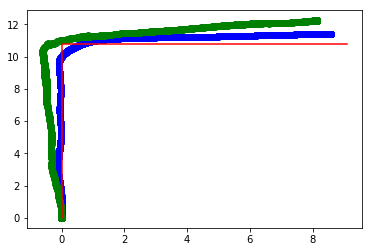

In [39]:
plt.plot(y, x, 'bo', y2, x2, 'go',[0,0,9.08], [0,10.8,10.8],'r') 